In [1]:
#import necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

# supress error
pd.options.mode.chained_assignment = None

# load data

In [2]:
# importing data and reading data from csv file
# entries do have whitespace at before chars --> remove them with skipinitialspace
data = pd.read_csv('data/adult.csv', header = None, skipinitialspace=True)
# name columns
data.columns = ['age', 'workclass', "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "income" ]
# show dataset
data.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


# describe dataset

In [3]:
# 32561 rows, 15 columns
data.shape

(32561, 15)

In [4]:
# Check for Null Data
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [5]:
# dataset has no NaNs but a lot of ?
data.select_dtypes(object).apply(lambda x: x.str.contains('?', regex=False)).sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

In [6]:
# replace ? with Nans
data = data.replace('?', np.NaN )

In [7]:
# Check for again for null data
data.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [8]:
# Get data types
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [9]:
# show all duplicated entries of the dataset
print('Duplicated entries:',data.duplicated().sum())
# # check if duplicated entries are NaN --> is not the case DELETE?
# data[data.duplicated()].isna().mean()

Duplicated entries: 24


In [10]:
# remove 24 duplicates
data = data.drop_duplicates()
print('Duplicated entries: ', data.duplicated().sum())

Duplicated entries:  0


## visualization

<AxesSubplot:xlabel='income', ylabel='count'>

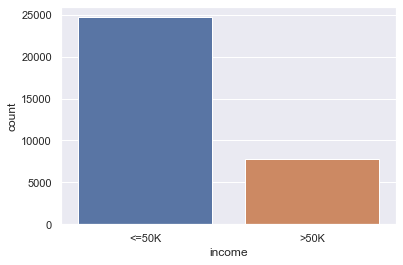

In [11]:
# Count of >50K & <=50K
sns.set_theme(style="darkgrid")
sns.countplot(x="income", data=data)

<AxesSubplot:xlabel='sex', ylabel='count'>

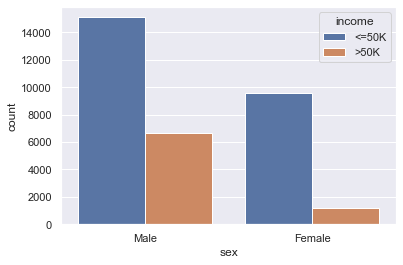

In [12]:
#difference male and female
sns.countplot(x="sex", hue='income', data=data)

In [13]:
# Alter wird hier durch Young, Adult und Old ersetzt --> macht das Sinn? Zahlen passen doch auch, oder? @Tina
# data_vis = data;
# data_vis['age'] = pd.cut(data_vis['age'], bins = [0, 25, 50, 100], labels = ['Young', 'Adult', 'Old'])
# sns.countplot(x = 'income', hue = 'age', data = data_vis)

<AxesSubplot:xlabel='education_num', ylabel='count'>

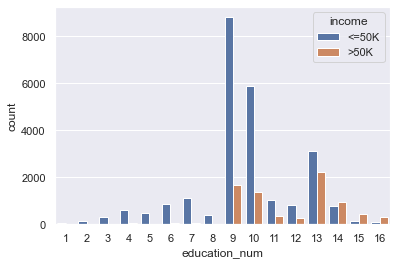

In [14]:
# income in correlation with education years
sns.countplot(x = 'education_num', hue = 'income', data = data)

<AxesSubplot:xlabel='income', ylabel='count'>

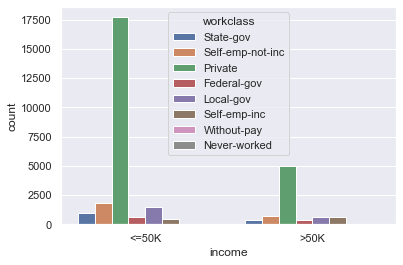

In [15]:
#Plotting workclass corresponding to the income
sns.countplot(x = 'income', hue = 'workclass', data = data)

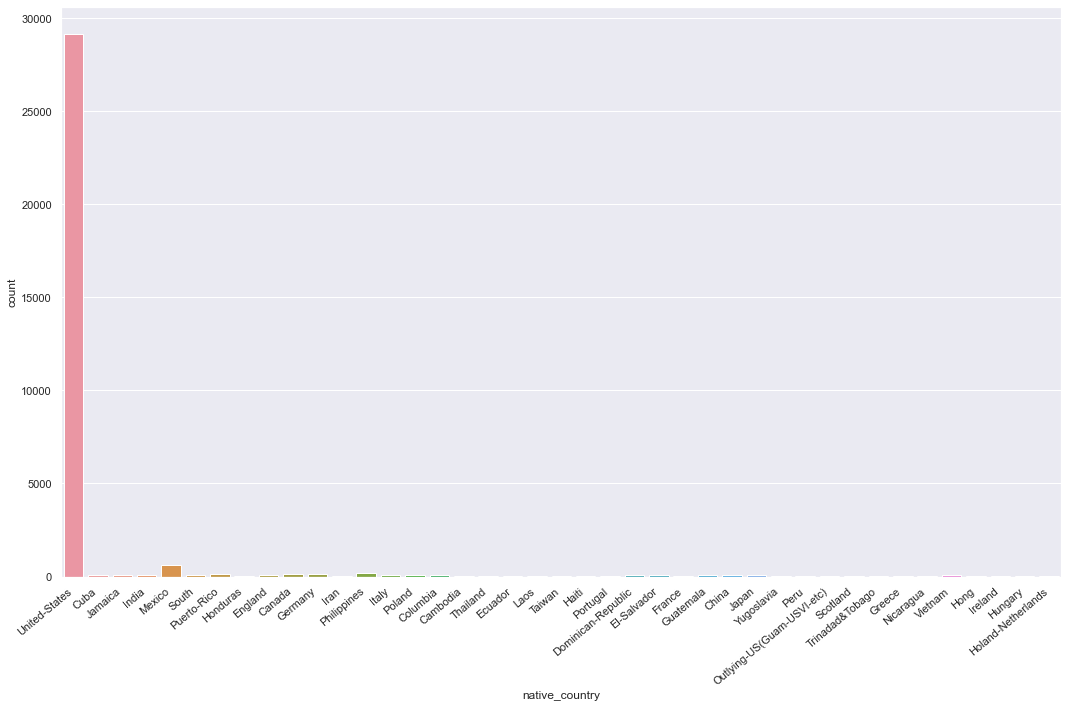

In [16]:
#Plot of Country corresponding to income
# plt.bar(count.index, count.values)
# plt.xlabel('Countries')
# plt.ylabel('Count')
# plt.title('Count from each Country')
plt.figure(figsize=(15,10))
ax = sns.countplot(x = 'native_country', data = data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [17]:
# visualize race

# preprocess data

In [18]:
print(data.shape)
print(data.capital_gain.unique().shape)
data.capital_loss.unique().shape

(32537, 15)
(119,)


(92,)

In [19]:
# dropping unimportant columns
# The ‘fnlwgt’ variable (stands for final weight) is removed as it has no predictive power since it is a feature aimed to allocate similar weights to people with similar demographic characteristics. 
# capital gain and capital loss are mostly 0
# education can be described by education-num 
data.drop(['fnlwgt', 'capital_gain', 'capital_loss', 'education'], axis=1, inplace=True)

## approach 1 with dropping rows with any na in it

In [20]:
# drop Na 
data_dropped = data.dropna(how='any')
# reset index after dropping rows
data_dropped = data_dropped.reset_index(drop=True)
print(data_dropped.isna().sum())
print(data_dropped.shape)

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
hours_per_week    0
native_country    0
income            0
dtype: int64
(30139, 11)


## approach 2 with replacing na values with mode

In [21]:
data.isnull().sum(axis = 0)

age                  0
workclass         1836
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
hours_per_week       0
native_country     582
income               0
dtype: int64

In [22]:
print(data['occupation'].describe())
data['occupation'] = data['occupation'].fillna('Prof-specialty')

count              30694
unique                14
top       Prof-specialty
freq                4136
Name: occupation, dtype: object


In [23]:
print(data['workclass'].describe())
data['workclass'] = data['workclass'].fillna('Private')

count       30701
unique          8
top       Private
freq        22673
Name: workclass, dtype: object


In [24]:
print(data['native_country'].describe())
data['native_country'] = data['native_country'].fillna('United-States')

count             31955
unique               41
top       United-States
freq              29153
Name: native_country, dtype: object


In [25]:
data.isna().sum()
print(data.shape)

(32537, 11)


## encoding approach 1

In [26]:
# encoding
# 1 = >50K; 0 = <=50K 
encoder_income = LabelEncoder()
data_dropped['income'] = encoder_income.fit_transform(data_dropped['income'])
encoder_worklass = LabelEncoder()
data_dropped['workclass'] = encoder_worklass.fit_transform(data_dropped['workclass'])
encoder_occupation = LabelEncoder()
data_dropped['occupation'] = encoder_occupation.fit_transform(data_dropped['occupation'])
encoder_relationship = LabelEncoder()
data_dropped['relationship'] = encoder_relationship.fit_transform(data_dropped['relationship'])
encoder_race = LabelEncoder()
data_dropped['race'] = encoder_race.fit_transform(data_dropped['race'])
encoder_sex = LabelEncoder()
data_dropped['sex'] = encoder_sex.fit_transform(data_dropped['sex'])
encoder_nativecountry  = LabelEncoder()
data_dropped['native_country'] = encoder_nativecountry.fit_transform(data_dropped['native_country'])
encoder_maritalstatus  = LabelEncoder()
data_dropped['marital_status'] = encoder_maritalstatus.fit_transform(data_dropped['marital_status'])
data_dropped.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income
0,39,5,13,4,0,1,4,1,40,38,0
1,50,4,13,2,3,0,4,1,13,38,0
2,38,2,9,0,5,1,4,1,40,38,0
3,53,2,7,2,5,0,2,1,40,38,0
4,28,2,13,2,9,5,2,0,40,4,0


In [27]:
#Splitting the data set into features and outcome
X_dropped = data_dropped.drop(['income'], axis=1)
Y_dropped = data_dropped['income']
print(Y_dropped)
X_dropped.head()

0        0
1        0
2        0
3        0
4        0
        ..
30134    0
30135    1
30136    0
30137    0
30138    1
Name: income, Length: 30139, dtype: int32


,age,workclass,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country
0,39,5,13,4,0,1,4,1,40,38
1,50,4,13,2,3,0,4,1,13,38
2,38,2,9,0,5,1,4,1,40,38
3,53,2,7,2,5,0,2,1,40,38
4,28,2,13,2,9,5,2,0,40,4


## encoding approach 2

In [28]:
# encoding
# 1 = >50K; 0 = <=50K 
encoder_income = LabelEncoder()
data['income'] = encoder_income.fit_transform(data['income'])
encoder_worklass = LabelEncoder()
data['workclass'] = encoder_worklass.fit_transform(data['workclass'])
encoder_occupation = LabelEncoder()
data['occupation'] = encoder_occupation.fit_transform(data['occupation'])
encoder_relationship = LabelEncoder()
data['relationship'] = encoder_relationship.fit_transform(data['relationship'])
encoder_race = LabelEncoder()
data['race'] = encoder_race.fit_transform(data['race'])
encoder_sex = LabelEncoder()
data['sex'] = encoder_sex.fit_transform(data['sex'])
encoder_nativecountry  = LabelEncoder()
data['native_country'] = encoder_nativecountry.fit_transform(data['native_country'])
encoder_maritalstatus  = LabelEncoder()
data['marital_status'] = encoder_maritalstatus.fit_transform(data['marital_status'])
data.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income
0,39,6,13,4,0,1,4,1,40,38,0
1,50,5,13,2,3,0,4,1,13,38,0
2,38,3,9,0,5,1,4,1,40,38,0
3,53,3,7,2,5,0,2,1,40,38,0
4,28,3,13,2,9,5,2,0,40,4,0


In [29]:
#Splitting the data set into features and outcome
X = data.drop(['income'], axis=1)
Y = data['income']
print(Y)
X.head()

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32537, dtype: int32


,age,workclass,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country
0,39,6,13,4,0,1,4,1,40,38
1,50,5,13,2,3,0,4,1,13,38
2,38,3,9,0,5,1,4,1,40,38
3,53,3,7,2,5,0,2,1,40,38
4,28,3,13,2,9,5,2,0,40,4


# train data 

In [30]:
# define k-fold properties
# @Tim welches n_splits ist sinnvoll?
kf = KFold(n_splits=5, shuffle=True)

## approach 1

In [31]:
# define arrays to save the accuracy of every step of k-fold cross validation
accuracy_kNeighbor_1 = []
accuracy_decisionTree_1 = []
accuracy_randomForest_1 = []
accuracy_logisticRegression_1 = []
accuracy_neuronalNet_1 = []

In [32]:
X_dropped = X_dropped.to_numpy()
Y_dropped = Y_dropped.to_numpy().reshape(-1)

In [33]:
for train_index, test_index in kf.split(X_dropped):
    
        X_train, X_test = X_dropped[train_index], X_dropped[test_index]
        Y_train, Y_test = Y_dropped[train_index], Y_dropped[test_index]
        
    #KNeighbor
        kNeighbor = KNeighborsClassifier(n_neighbors=5)
        #train random forest only on training data
        kNeighbor = kNeighbor.fit(X_train, Y_train)
        #test random forest with test data
        kNeighbor_pred = kNeighbor.predict(X_test)
        kNeighbor_accuracy = accuracy_score(Y_test, kNeighbor_pred)
        print(f'KNeighbor: {kNeighbor_accuracy}')
        accuracy_kNeighbor_1.append(kNeighbor_accuracy)
        
    #Decision Tree
        decisionTree = DecisionTreeClassifier(random_state=0, criterion = 'entropy')
        #train decision tree only on training data
        decisionTree = decisionTree.fit(X_train, Y_train)
        #test decision tree with test data
        decisionTree_pred = decisionTree.predict(X_test)
        decisionTree_accuracy = accuracy_score(Y_test, decisionTree_pred)
        print(f'Decision Tree: {decisionTree_accuracy}')
        accuracy_decisionTree_1.append(decisionTree_accuracy)
        
    #Random Forest
        randomForest = RandomForestClassifier(max_depth=2, random_state=0)
        #train random forest only on training data
        randomForest = randomForest.fit(X_train, Y_train)
        #test random forest with test data
        randomForest_pred = randomForest.predict(X_test)
        randomForest_accuracy = accuracy_score(Y_test, randomForest_pred)
        print(f'Random Forest: {randomForest_accuracy}')
        accuracy_randomForest_1.append(randomForest_accuracy)
        
    #Logistic Regression
        logisticRegression = LogisticRegression(random_state=0, max_iter=500)
        #train logistic regression only on training data
        logisticRegression = logisticRegression.fit(X_train, Y_train)
        #test random forest with test data
        logisticRegression_pred = logisticRegression.predict(X_test)
        logisticRegression_accuracy = accuracy_score(Y_test, logisticRegression_pred)
        print(f'Logistic Regression: {logisticRegression_accuracy}')
        accuracy_logisticRegression_1.append(logisticRegression_accuracy)
        
    #Neuronal Net
        #@Tim welche max_iter sinnvoll? --> dauert so sehr lange schlimm?
        neuronalNet = MLPClassifier(random_state=1, max_iter=500).fit(X_train, Y_train)
        neuronalNet_pred = neuronalNet.predict(X_test)
        neuronalNet_accuracy = accuracy_score(Y_test, neuronalNet_pred)
        print(f'Neuronales Netz: {neuronalNet_accuracy}')
        accuracy_neuronalNet_1.append(neuronalNet_accuracy)
        print('\n')

KNeighbor: 0.7947909754479098
Decision Tree: 0.7702388852023888
Random Forest: 0.8100530856005309
Logistic Regression: 0.7991041804910418
Neuronales Netz: 0.8218314532183145


KNeighbor: 0.7959522229595223
Decision Tree: 0.7790311877903119
Random Forest: 0.80092899800929
Logistic Regression: 0.7981088254810883
Neuronales Netz: 0.8239880557398805


KNeighbor: 0.805242203052422
Decision Tree: 0.7767086927670869
Random Forest: 0.8044127405441274
Logistic Regression: 0.8044127405441274
Neuronales Netz: 0.8198407431984074


KNeighbor: 0.7972793629727937
Decision Tree: 0.7848374253483743
Random Forest: 0.8035832780358327
Logistic Regression: 0.8049104180491041
Neuronales Netz: 0.8233244857332449


KNeighbor: 0.7979094076655052
Decision Tree: 0.7803218848515016
Random Forest: 0.8086942093910735
Logistic Regression: 0.8027210884353742
Neuronales Netz: 0.8281068524970964




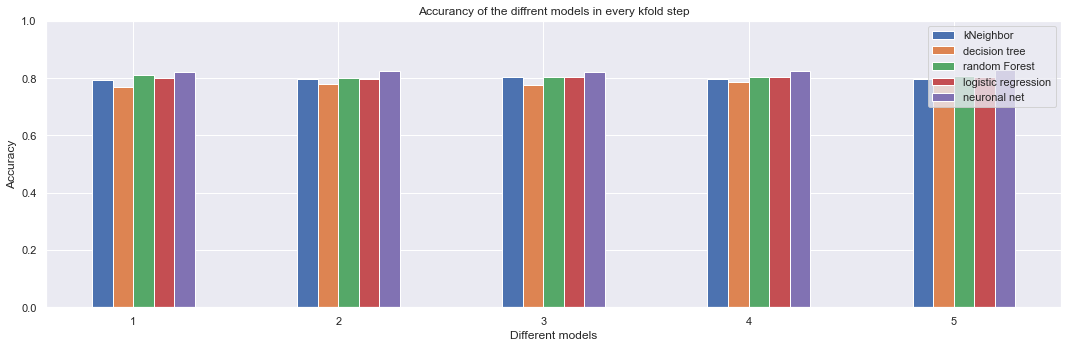

In [34]:
# print accuracy of each kfold step
plt.figure(figsize=(15,5))
ax = plt.subplot()
width = 0.1

X_label = ['1', '2', '3', '4', '5']
_X = np.arange(len(X_label))

ax.bar(_X, accuracy_kNeighbor_1, width, label='kNeighbor')
ax.bar(_X + width, accuracy_decisionTree_1, width, label='decision tree')
ax.bar(_X + (2*width), accuracy_randomForest_1, width, label='random Forest')
ax.bar(_X + (3*width), accuracy_logisticRegression_1, width, label='logistic regression')
ax.bar(_X + (4*width), accuracy_neuronalNet_1, width, label='neuronal net')

ax.set_ylabel('Accuracy')
ax.set_ylim(0,1)
ax.set_xticks(_X + width + width/2)
ax.set_xticklabels(X_label)
ax.set_xlabel('Different models')
ax.set_title('Accurancy of the diffrent models in every kfold step')
ax.legend()

plt.tight_layout()

plt.show()

In [35]:
# calculate average accuracy
avg_kNeigbor_1 = sum(accuracy_kNeighbor_1)/len(accuracy_kNeighbor_1)
avg_decisionTree_1 = sum(accuracy_decisionTree_1)/len(accuracy_decisionTree_1)
avg_randomForest_1 = sum(accuracy_randomForest_1)/len(accuracy_randomForest_1)
avg_logisticRegression_1 = sum(accuracy_logisticRegression_1)/len(accuracy_logisticRegression_1)
avg_neuronalNet_1 = sum(accuracy_neuronalNet_1)/len(accuracy_neuronalNet_1)

In [36]:
print(f'KNeighbor: {avg_kNeigbor_1}')
print(f'Decision Tree: {avg_decisionTree_1}')
print(f'Random Forest: {avg_randomForest_1}')
print(f'Logistic Regression: {avg_logisticRegression_1}')
print(f'Neuronal Net: {avg_neuronalNet_1}')

KNeighbor: 0.7982348344196306
Decision Tree: 0.7782276151919327
Random Forest: 0.8055344623161709
Logistic Regression: 0.8018514506001472
Neuronal Net: 0.8234183180773886


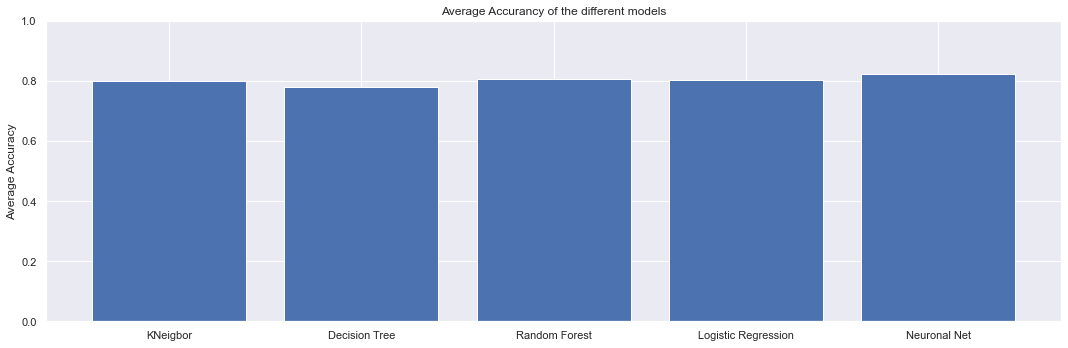

In [37]:
# print average accuracy of each model
plt.figure(figsize=(15,5))
ax = plt.subplot()
models = ['KNeigbor', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'Neuronal Net']
avg_accuracies_1 = [avg_kNeigbor_1, avg_decisionTree_1, avg_randomForest_1, avg_logisticRegression_1, avg_neuronalNet_1] 

ax.bar(models, avg_accuracies_1)

ax.set_ylabel('Average Accuracy')
ax.set_ylim(0,1)
ax.set_title('Average Accurancy of the different models')

plt.tight_layout()
plt.show()

## aproach 2

In [38]:
# define arrays to save the accuracy of every step of k-fold cross validation
accuracy_kNeighbor_2 = []
accuracy_decisionTree_2 = []
accuracy_randomForest_2 = []
accuracy_logisticRegression_2 = []
accuracy_neuronalNet_2 = []

In [39]:
X = X.to_numpy()
Y = Y.to_numpy().reshape(-1)

In [40]:
for train_index, test_index in kf.split(X):
    
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        
    #KNeighbor
        kNeighbor = KNeighborsClassifier(n_neighbors=5)
        #train random forest only on training data
        kNeighbor = kNeighbor.fit(X_train, Y_train)
        #test random forest with test data
        kNeighbor_pred = kNeighbor.predict(X_test)
        kNeighbor_accuracy = accuracy_score(Y_test, kNeighbor_pred)
        print(f'KNeighbor: {kNeighbor_accuracy}')
        accuracy_kNeighbor_2.append(kNeighbor_accuracy)
        
    #Decision Tree
        decisionTree = DecisionTreeClassifier(random_state=0, criterion = 'entropy')
        #train decision tree only on training data
        decisionTree = decisionTree.fit(X_train, Y_train)
        #test decision tree with test data
        decisionTree_pred = decisionTree.predict(X_test)
        decisionTree_accuracy = accuracy_score(Y_test, decisionTree_pred)
        print(f'Decision Tree: {decisionTree_accuracy}')
        accuracy_decisionTree_2.append(decisionTree_accuracy)
        
    #Random Forest
        randomForest = RandomForestClassifier(max_depth=2, random_state=0)
        #train random forest only on training data
        randomForest = randomForest.fit(X_train, Y_train)
        #test random forest with test data
        randomForest_pred = randomForest.predict(X_test)
        randomForest_accuracy = accuracy_score(Y_test, randomForest_pred)
        print(f'Random Forest: {randomForest_accuracy}')
        accuracy_randomForest_2.append(randomForest_accuracy)
        
    #Logistic Regression
        logisticRegression = LogisticRegression(random_state=0, max_iter=500)
        #train logistic regression only on training data
        logisticRegression = logisticRegression.fit(X_train, Y_train)
        #test random forest with test data
        logisticRegression_pred = logisticRegression.predict(X_test)
        logisticRegression_accuracy = accuracy_score(Y_test, logisticRegression_pred)
        print(f'Logistic Regression: {logisticRegression_accuracy}')
        accuracy_logisticRegression_2.append(logisticRegression_accuracy)
        
    #Neuronal Net
        #@Tim welche max_iter sinnvoll? --> dauert so sehr lange schlimm?
        neuronalNet = MLPClassifier(random_state=1, max_iter=500).fit(X_train, Y_train)
        neuronalNet_pred = neuronalNet.predict(X_test)
        neuronalNet_accuracy = accuracy_score(Y_test, neuronalNet_pred)
        print(f'Neuronales Netz: {neuronalNet_accuracy}')
        accuracy_neuronalNet_2.append(neuronalNet_accuracy)
        print('\n')

KNeighbor: 0.7913337430854334
Decision Tree: 0.7701290719114936
Random Forest: 0.794099569760295
Logistic Regression: 0.8014751075599262
Neuronales Netz: 0.8240626920712969


KNeighbor: 0.8040872771972957
Decision Tree: 0.7904118008604795
Random Forest: 0.8051628764597418
Logistic Regression: 0.8011677934849416
Neuronales Netz: 0.8277504609711125


KNeighbor: 0.8002151529122483
Decision Tree: 0.781312432764715
Random Forest: 0.8009835561702782
Logistic Regression: 0.8003688335638544
Neuronales Netz: 0.8232672506531428


KNeighbor: 0.8091286307053942
Decision Tree: 0.7871522975257416
Random Forest: 0.8115875211310896
Logistic Regression: 0.8112801598278777
Neuronales Netz: 0.8377132319041033


KNeighbor: 0.8074381435377286
Decision Tree: 0.7831566005839865
Random Forest: 0.8123559243891194
Logistic Regression: 0.8160442600276625
Neuronales Netz: 0.7943752881512217




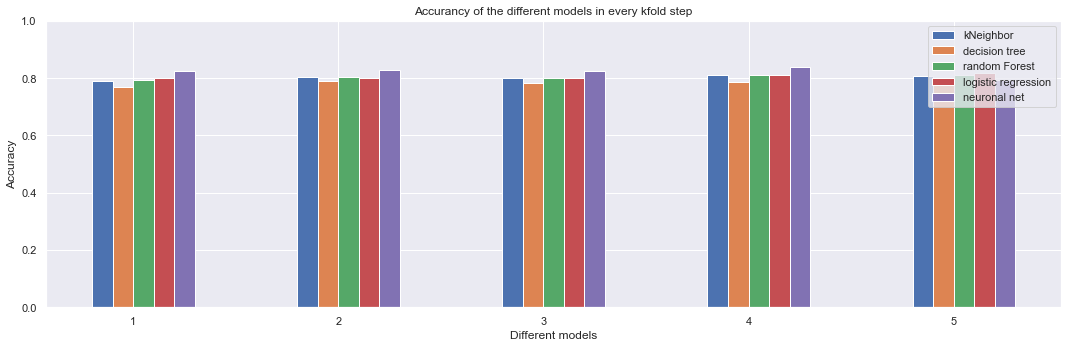

In [41]:
# print accuracy of each kfold step
plt.figure(figsize=(15,5))
ax = plt.subplot()
width = 0.1

X_label = ['1', '2', '3', '4', '5']
_X = np.arange(len(X_label))

ax.bar(_X, accuracy_kNeighbor_2, width, label='kNeighbor')
ax.bar(_X + width, accuracy_decisionTree_2, width, label='decision tree')
ax.bar(_X + (2*width), accuracy_randomForest_2, width, label='random Forest')
ax.bar(_X + (3*width), accuracy_logisticRegression_2, width, label='logistic regression')
ax.bar(_X + (4*width), accuracy_neuronalNet_2, width, label='neuronal net')

ax.set_ylabel('Accuracy')
ax.set_ylim(0,1)
ax.set_xticks(_X + width + width/2)
ax.set_xticklabels(X_label)
ax.set_xlabel('Different models')
ax.set_title('Accurancy of the different models in every kfold step')
ax.legend()

plt.tight_layout()

plt.show()

In [42]:
# calculate average accuracy
avg_kNeigbor_2 = sum(accuracy_kNeighbor_2)/len(accuracy_kNeighbor_2)
avg_decisionTree_2 = sum(accuracy_decisionTree_2)/len(accuracy_decisionTree_2)
avg_randomForest_2 = sum(accuracy_randomForest_2)/len(accuracy_randomForest_2)
avg_logisticRegression_2 = sum(accuracy_logisticRegression_2)/len(accuracy_logisticRegression_2)
avg_neuronalNet_2 = sum(accuracy_neuronalNet_2)/len(accuracy_neuronalNet_2)

In [43]:
print(f'KNeighbor: {avg_kNeigbor_2}')
print(f'Decision Tree: {avg_decisionTree_2}')
print(f'Random Forest: {avg_randomForest_2}')
print(f'Logistic Regression: {avg_logisticRegression_2}')
print(f'Neuronal Net: {avg_neuronalNet_2}')

KNeighbor: 0.80244058948762
Decision Tree: 0.7824324407292832
Random Forest: 0.8048378895821049
Logistic Regression: 0.8060672308928526
Neuronal Net: 0.8214337847501755


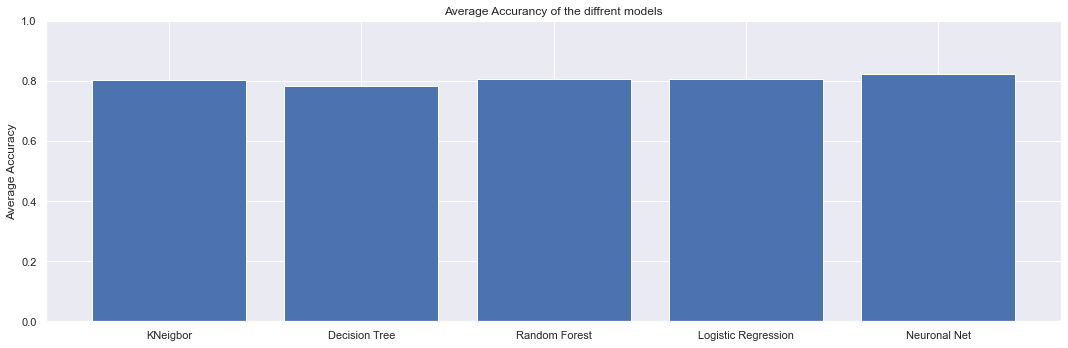

In [44]:
# print average accuracy of each model
plt.figure(figsize=(15,5))
ax = plt.subplot()
models = ['KNeigbor', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'Neuronal Net']
avg_accuracies_2 = [avg_kNeigbor_2, avg_decisionTree_2, avg_randomForest_2, avg_logisticRegression_2, avg_neuronalNet_2] 

ax.bar(models, avg_accuracies_2)

ax.set_ylabel('Average Accuracy')
ax.set_ylim(0,1)
ax.set_title('Average Accurancy of the diffrent models')

plt.tight_layout()
plt.show()

## compare approaches

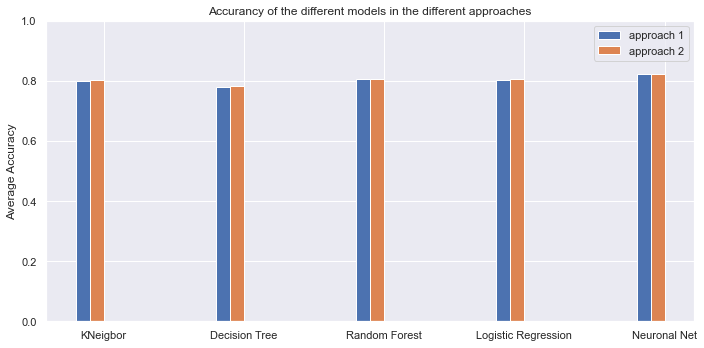

In [45]:
# print average accuracy of each approach
plt.figure(figsize=(10,5))
ax = plt.subplot()
width = 0.1

X_label = ['KNeigbor', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'Neuronal Net']
_X = np.arange(len(X_label))

ax.bar(_X, avg_accuracies_1, width, label='approach 1')
ax.bar(_X + width, avg_accuracies_2, width, label='approach 2')

ax.set_ylabel('Average Accuracy')
ax.set_ylim(0,1)
ax.set_xticks(_X + width + width/2)
ax.set_xticklabels(X_label)
ax.set_title('Accurancy of the different models in the different approaches')
ax.legend()

plt.tight_layout()

plt.show()

# evaluation

## approach 1